## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import read_data as rd
import Pass
import numpy as np
import glob
from Scratch import Scratch
from scipy.interpolate import interp1d

## Read and display data for individual scratches

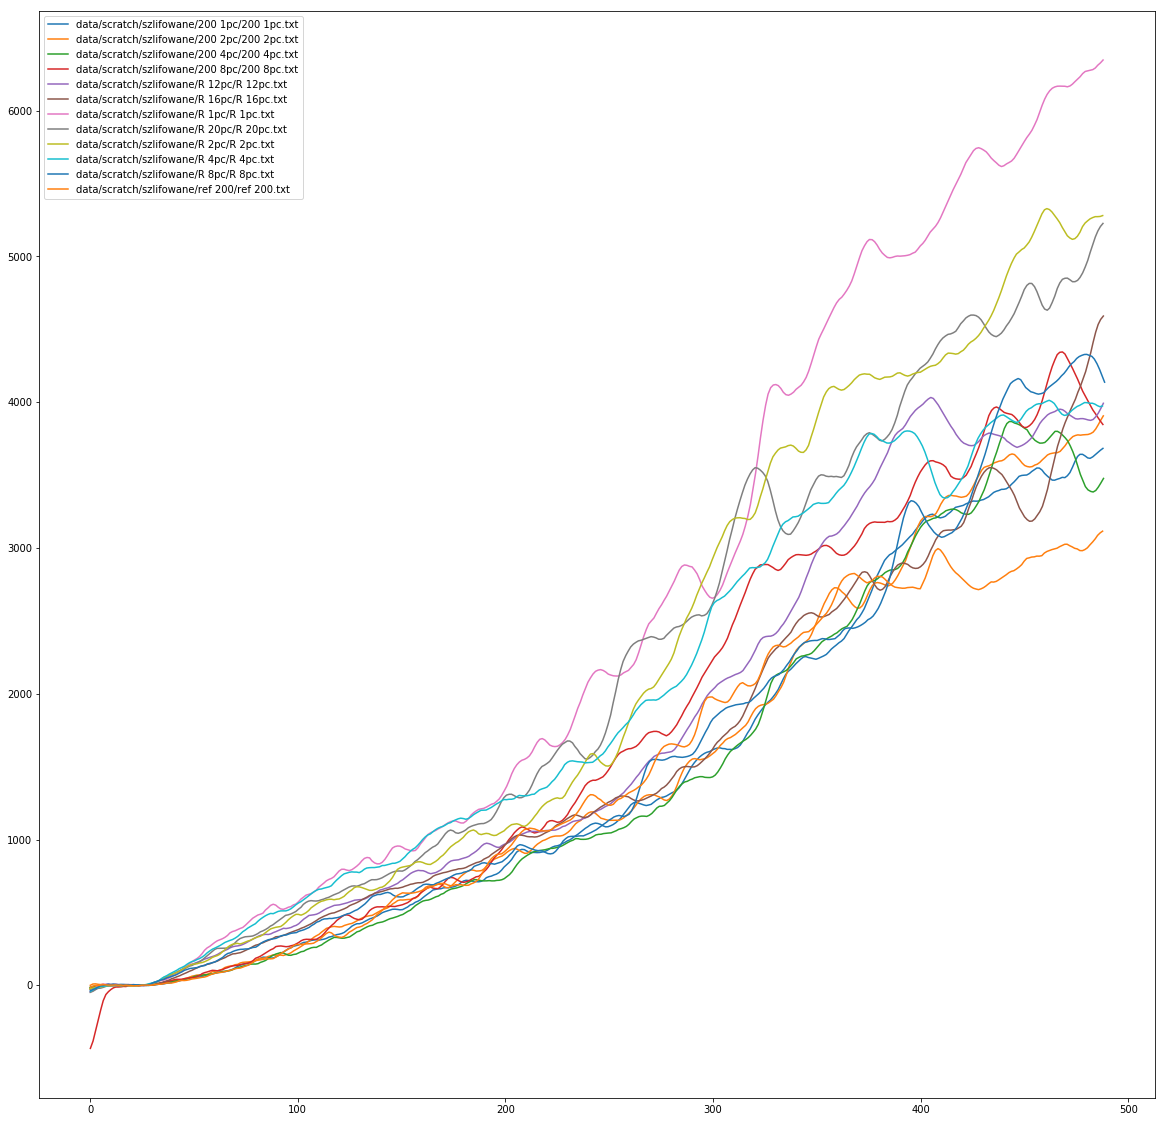

In [30]:
fileList = sorted(glob.glob('data/scratch/szlifowane/*/*.txt'))
sampleList = []
#for file in fileList:
#    print(file)
#    scratchList.append(rd.read_data(file))
sampleList = [rd.read_data(file) for file in fileList]
siz = len(sampleList)

fig = pyplot.figure(figsize=(20,20))
ax = fig.add_subplot(111)
meanScratches = []
i = 0
for sample in sampleList:
    for scratch in sample:
        #print(len(scratch.topo1.depth))
        #print(len(scratch.scratch.depth))
        #print(len(scratch.topo2.depth))
        scratch.addBaseline()
        scratch.truncate(400)
        scratch.topo2.depth = scratch.topo2.depth - scratch.topo2.depth[20]
    meanScratches.append(Scratch.meanScratchList(sample))
    
    ax.plot(meanScratches[-1].scratch.distance, meanScratches[-1].topo2.depth, label=fileList[i])
    i = i + 1
    
ax.legend(loc='upper left')
    



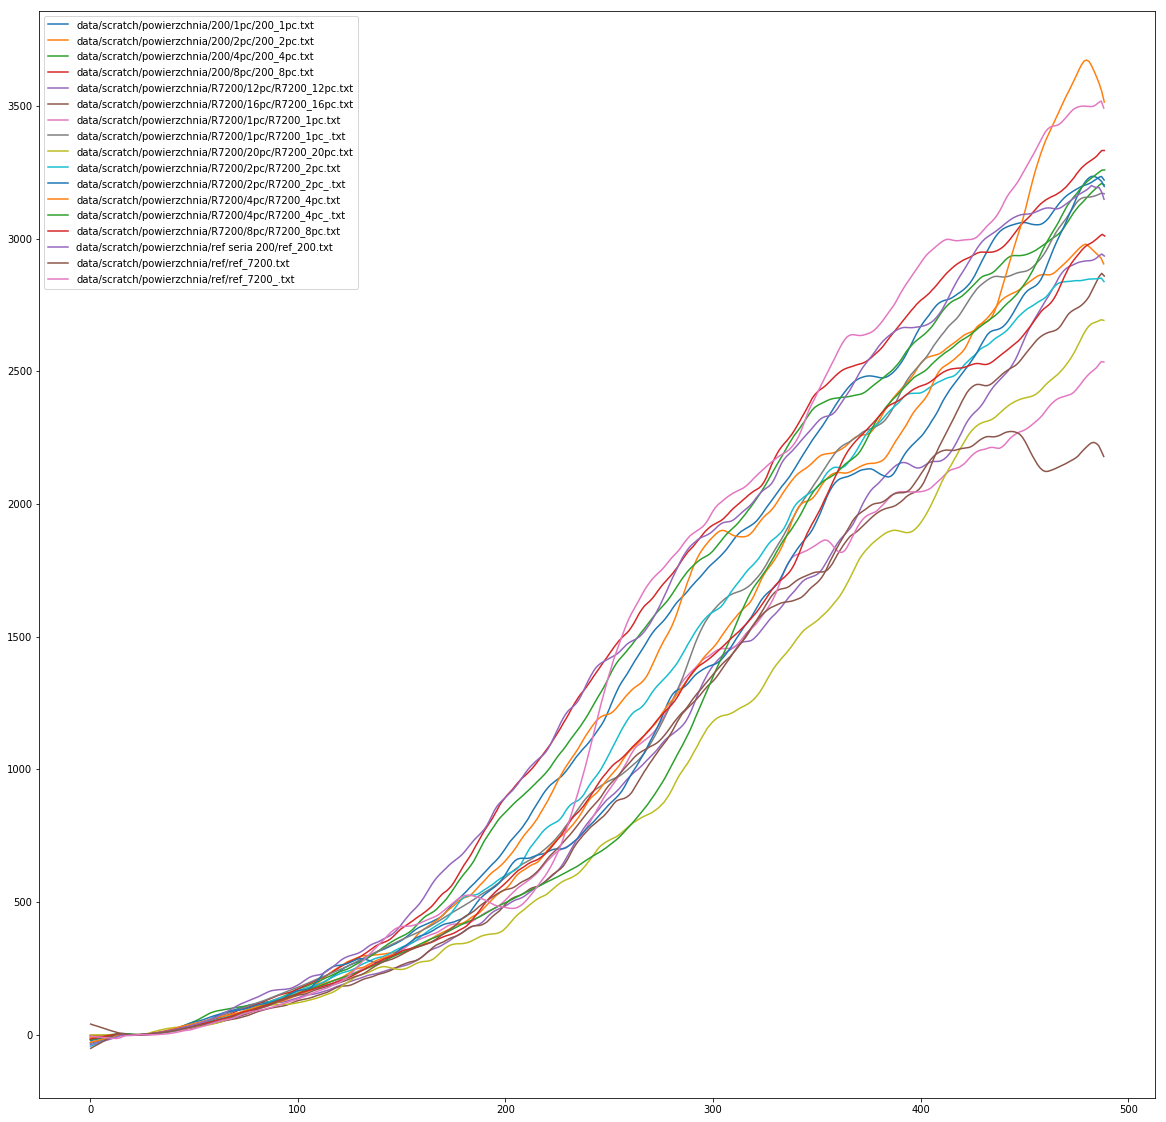

In [33]:
fileList = sorted(glob.glob('data/scratch/powierzchnia/*/*.txt') + glob.glob('data/scratch/powierzchnia/*/*/*.txt'))
sampleList = []
#for file in fileList:
#    print(file)
#    scratchList.append(rd.read_data(file))
sampleList = [rd.read_data(file) for file in fileList]
siz = len(sampleList)

fig = pyplot.figure(figsize=(20,20))
ax = fig.add_subplot(111)
meanScratches = []
i = 0
for sample in sampleList:
    for scratch in sample:
        #print(len(scratch.topo1.depth))
        #print(len(scratch.scratch.depth))
        #print(len(scratch.topo2.depth))
        scratch.addBaseline()
        scratch.topo2.depth = np.convolve(scratch.topo2.depth, np.ones(20,)/20, mode='same')
        scratch.topo2.depth = scratch.topo2.depth - scratch.topo2.depth[20]
        scratch.truncate(400)
    meanScratches.append(Scratch.meanScratchList(sample))
    
    ax.plot(meanScratches[-1].scratch.distance, meanScratches[-1].topo2.depth, label=fileList[i])
    i = i + 1
    
ax.legend(loc='upper left')

## Compute coating thickness

Put min and max limits for substrat surface and coating surface.

In [3]:
limits = [[0, 80, 100, 170],
          [0, 900, 1000, 1200],
          [0, 300, 430, 600],
          [0, 300, 350, 420],
          [0, 300, 390, 850]]

fig2 = pyplot.figure(figsize = (15,2*siz))

for i in range(len(passList)):
    min1 = limits[i][0]
    max1 = limits[i][1]
    min2 = limits[i][2]
    max2 = limits[i][3]
    fit1 = np.polyfit( passList[i].distance[min1:max1], passList[i].depth[min1:max1], 1 )
    fit2 = np.polyfit( passList[i].distance[min2:max2], passList[i].depth[min2:max2], 1 )
    print('for ' + fileList[i] + ' coating thickness is:')
    print(np.abs(fit1[1]-fit2[1]))
    print()
    passList[i].depth = passList[i].depth - np.poly1d(fit1)(passList[i].distance)
    ax = fig2.add_subplot( (siz)*100 + i+11)
    ax.plot(passList[i].distance[min1:max2], passList[i].depth[min1:max2])


NameError: name 'passList' is not defined

<Figure size 1080x1728 with 0 Axes>

In [ ]:
pyplot.plot(passList[1].depth[1000:1200])